
<p><img alt="udeA logo" height="120px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="10px" vspace="0px" style="width:107px;height:152px;"></p>

# <center> <font color='0B5345'>Homework 1.3:</font> </center>
# <center> <font color='0B5345'>Hashing</font> </center>



## Task: T1

<p justify="align">
<font face="Verdana" size='2.0'>
Define a class and its methods for building a universal family of hash functions.
<ul align="justify">
<li>The documentation to generate prime numbers <a href="https://pypi.org/project/primesieve/">here</a>. The code to get an array of the first $10$ primes $\ge  1000$ is:  <b><font color="green"> n_primes(10, 1000)</font></b><br>
<a>Hint: </a>The simplest <b>primality test</b> is trial division is given an input number, $n$, check whether it is evenly divisible by any prime number between $2$ and $\sqrt n$  (i.e. that the division leaves no remainder). If so, then $n$ is composite. Otherwise, it is prime. </li>
<li>You need to use a bitmap array.The documentation about the bitmap array <a href="https://pypi.org/project/bitmap">here</a></li>
</ul>
</p>
</font>


###  I. sign in with grader

In [ ]:
#you must run this code to enable the grader

!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

In [ ]:
# Please DON'T MODIFY THIS CODE
#  sig in.
#  lab_id =  it is the laboratory id in grader
# init.course_id = "LOGICA_3.v1"  or "bigdata.v2"
init.course_id = "LOGICA_3.v1"
import inspect
from local.lib.rlxmoocapi import session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L01.03", varname="student");

logging in as estiven.carmona@udea.edu.co... please wait
using course session LOGICA_3.v1::2023.2
success!! you are logged in


### II. Add your solution

In [ ]:
 pip install bitmap

In [ ]:
!pip install primesieve==2.3.0

In [ ]:
# define hash_familiy classs and its methods inside my_solution method

def my_solution_t1(capacity):                                           # You have to add some code in the class hash_family.
  import numpy as np
  import random
  from bitmap import BitMap
  from primesieve import n_primes

  class HashFamily:

    def __init__(self, capacity):                                     # capacity is the expected numbers of elements in hash table.

      ### START YOUR CODE HERE ###
      self._buckets =  n_primes(1, capacity+1)[0]                             # To be calculated (the first prime number greater than capacity)
      self._a = random.randint(1, self._buckets)                            # To be calculated
      self._b = random.randint(0, self._buckets)                            # To be calculated
      ### END YOUR CODE HERE ###
      self._table = BitMap(self._buckets)                                   # We will use a bitMap array as a hash table.
      self._n =  0                                                          # hold the number of elements stored in the table

    def get_hash(self, key):                                                   # return the position in array (int)
      ### START CODE HERE ###
      position = ((self._a * key + self._b) % self._buckets) % capacity
      ### END CODE HERE ###
      return position

    def get_function(self):                                                 # return the hash function.
      return self._a,self._b,self._buckets, capacity

    def set_item(self,pos):                                                 # Hint: don't use the method hash inside setItem_
      ### START CODE HERE ###
      self._table.set(pos)                                             # Turn on the position into the BitMap.
      self._n += 1                                                          # Increase n.
      ### END CODE HERE ###
      return pos                                                       # position is an Integer

    def get_item(self,position):
      ### START CODE HERE ###
      boolean = self._table.test(position)
      ### END CODE HERE ###
      return boolean                                                        # FALSE when bucket is empty. Otherwise TRUE.

    def load_factor(self):
       return (self._n / self._buckets)

  return HashFamily(capacity)

### III. Test your solution

In [ ]:
# run this code for testing your solution
# Compute numbers of buckets and build hash_table
capacity = input('Please enter the range of values into the universe: ')
try:
   val = int(capacity)
except ValueError:
    print("No.. input string is not an Integer. It's a string")
    sys.exit("program is aborted....")

member = my_solution_t1(val)

Please enter the range of values into the universe: 20


In [ ]:
a,b,p,n =member.get_function()
print("function is (",a,"* key + ", b, ") module",p, "module",n)

function is ( 8 * key +  9 ) module 23 module 20


In [ ]:
import numpy as np
print(member._table)
for i in range(0,int(capacity)):
    value = np.random.randint(1, val)
    # next = i
    pos= member.get_hash(value)
    print( "value",value,"hash",pos)
    pos=member.set_item(pos)
print(member._table)

000000000000000000000000
value 17 hash 7
value 12 hash 13
value 1 hash 17
value 17 hash 7
value 19 hash 0
value 5 hash 3
value 8 hash 4
value 10 hash 0
value 16 hash 2
value 4 hash 18
value 19 hash 0
value 3 hash 10
value 18 hash 15
value 2 hash 2
value 3 hash 10
value 14 hash 6
value 12 hash 13
value 2 hash 2
value 13 hash 1
value 4 hash 18
000001101010010011011111


### IV. Submit your solution

In [ ]:
student.submit_task(globals(), task_id="T1");

## Task: T2

<p align="justify">
<font face="Verdana" size='2.0'>
Let the alphabet be {A,B,C,D,E,F,G,H,I,J}. Let assume that each key is a composition of letters taken from this alphabet, where len(key) = 3. Examples: AAA, BCI, FAE, DFA. Use  the previous hash family class.<br>
<ul align="justify">
<li>You need to calculate the parameter <em>capacity</em> over the universal set of possibles values. </em>.</li>
<li>You need to add the method  <em>map_the_key</em> to the hash_family class.  Use the built-in library hashlib, the method <em>sha256.
<li> You need to rewrite the method:   <em>hash_(self, key)</em></li></ul>
</font>

### II. Add your solution

In [ ]:
# define hash family class
# Use and modify the class defined in exercise 1.
def my_solution_t2(capacity):
  import numpy as np
  from bitmap import BitMap
  import random
  from primesieve import n_primes
  import hashlib

  class HashFamily:

    def __init__(self, capacity):
      # Use the same constructor of Task_id: T1
      ### START YOUR CODE HERE ###
      self._buckets =  n_primes(1, capacity+1)[0]                             # To be calculated (the first prime number greater than capacity)
      self._a = random.randint(1, self._buckets)                            # To be calculated
      self._b = random.randint(0, self._buckets)                            # To be calculated
      ### END YOUR CODE HERE ###
      self._table = BitMap(self._buckets)                                   # We will use a bitMap array as a hash table.
      self._n =  0

    def get_hash(self, key):
      mapped_key = self.map_the_key(key)                                           #call the method for mapping the key
      bucket_number = (((self._a * mapped_key) + self._b) % self._buckets) % capacity           # apply the hash function.
      return bucket_number, mapped_key                                             # Return bucket(integer) and the mapped_key (int)

    def get_function(self):
      return  self._a,self._b,self._buckets, capacity

    def set_item(self,pos):
        ### START CODE HERE ###
        self._table.set(pos)                                             # Turn on the position into the BitMap.
        self._n += 1                                                          # Increase n.
        ### END CODE HERE ###
        return pos

    def get_item(self,position):
      ### START CODE HERE ###
      boolean = self._table.test(position)
      ### END CODE HERE ###
      return boolean

    def load_factor_(self):
      return  (self._n / self._buckets)

    def map_the_key(self,key):   # key is a three-word string from a vocabulary having 10 words.
      ### START YOUR CODE HERE ###
      key_encode = key.encode('utf-8')
      sha256_hash = hashlib.sha256(key_encode).hexdigest()  # use the sha256 method of hashlib method. Hint you must to encode the key, and use hexdigest()
      mapped_key = int(sha256_hash, 16)   # convert sha256_hash to int, take in mind the 16 base
      ### END YOUR CODE HERE ###
      return mapped_key

  return HashFamily(capacity)

### III. Test your solution


In [ ]:
capacity = input('Please enter the range of values into the universe: ')
try:
   val = int(capacity)
except ValueError:
    print("No.. input string is not an Integer. It's a string")
    sys.exit("program is aborted....")

member = my_solution_t2(val)

Please enter the range of values into the universe: 20


In [ ]:
a,b,p,n =member.get_function()
print("function is (",a,"* key + ", b, ") module",p, "module",n)

function is ( 10 * key +  14 ) module 23 module 20


In [ ]:
import numpy as np
print(member._table)

alphabet = {
                    0:"A", 1:"B", 2: "C", 3:"D" , 4:"E" , 5: "F" ,6: "G",7: "H" ,8: "I", 9:"J"
                  }
for i in range(0,int(capacity)):
    key = ""
    for j in range(1,4):
        l= np.random.randint(0,10)
        key = key + alphabet[l]
    pos, val = member.get_hash(key)
    print( "key",key,"hash value",pos)
    val1 = member.set_item(pos)
print(member._table)

000000000000000000000000
key JJF hash value 14
key ICF hash value 18
key IHF hash value 10
key HAB hash value 6
key AJB hash value 10
key ICF hash value 18
key GBJ hash value 1
key ADE hash value 11
key DFB hash value 1
key CBD hash value 19
key IEG hash value 12
key HGA hash value 19
key CFB hash value 10
key HHH hash value 2
key GIB hash value 17
key GIE hash value 9
key AGA hash value 1
key JCJ hash value 16
key JAB hash value 17
key ABF hash value 1
000011110101111001000110


### IV. Submit your solution

In [ ]:
student.submit_task(globals(), task_id="T2");

## Task: T3


<ol align="justify"> <font face="Verdana" size='2.5'>
<li>Suppose a hash function $h$ used to hash $n$ distinct keys. You use a hash table of length $m$. Assuming simple uniform hash, what is the expected number of collisions? <br>
<a>Hints:</a>
<ul> <font face="Verdana" size="2.5">
<li>Suppose $U = \{ x_1, ...x_n \}$ is a set totally ordered. </li>
<li>Let $X$ be the number of ordered elements
$x_i, x_{j}, x_{j+1}, x_{j+2}...x_n$, such as  $x_j \gt  x_i$ and  $h(x_i) = h(x_j)$ for $x_j, x_{j+1},x_{j+2},...,x_n$   </li>
<li>$ \forall x_i, x_j \in U$, $x_j \gt x_i$ find  $E[X] = \sum_{j \gt i}  \mathscr{P} (h(x_i) = h(x_j))$</li>
</ul>
<font face="Verdana" size="2.5">
<li><b>Claim 1</b> says: For a given  $x_1,x_2$  such that  $x_1 \ne x_2$  and  $y_1,y_2 ∈ [0,p−1]$  there exists only one function  $f(a,b)$  such that.
$f_{a,b}(x_1) = y_1\tag{2}$ $f_{a,b}(x_2) = y_2\tag{3}$
prove <b>claim 1.</b>  </li>
<li>Why the number of pairs  $(y_1,y_2)$  is $≤ \frac{(p − 1)}{n}$ after counting the all cases where $y_2$ be equal to $(y_1 \ mod \ n)$ as long as $y_1 \ne y_2$ and <br> $y_1 ≡ y_2 \ \ \ \  ( \mod n) \tag{7}\ \ \  \text{    --  congruent modulo n}$ </li>
<li>¿Why we can use in practice the hash function $h_{a,b}(x) = (ax + b) \mod p $  instead of $h_{a,b}(x) = (ax + b) \mod p \mod n $ as a universal hash family?</li>
<li>
A cryptographic hash function used in many blockchain implementations is the <em>Secure Hash Algorithm (SHA-256)</em>. This function has an output of 32 bytes (1 byte = 8 bits, 32 bytes = 256 bits), generally displayed as a 64-character hexadecimal string.<br>
Calculate the collision probability for SHA-256.</li>
<li>Suppose a classroom of 100 students and a 365-day year. Suppose a student is equally likely to have been born on any day of those 365 days, ignore twins and avoid leap years. Find the probability that all $100$ students have different birthdays.</li>
<li>¿What is the probability of having 500 balls be thrown them to a different bin on any of 1000 available ones?? </li>
<li><font face="Verdana" size='2.5'>The following picture shows the probability of having of number of balls ranging from 1 to 1000 be thrown them to a different bin on any of 10000 available ones. How do you explain the behavoiur of this function? </li>
</ol>

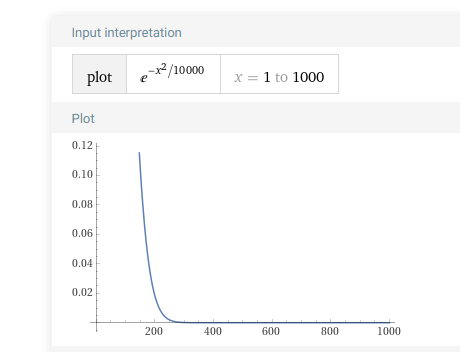